In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from ydata_profiling import ProfileReport

In [2]:
# figure settings
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

sns.set()
sns.set_theme(style="whitegrid")

# set seed
np.random.seed(7)

## Import data
---
Import and transform the dataset to pandas.

In [3]:
# load
x_train = pd.read_csv("../../data/raw/train_values.csv")
y_train = pd.read_csv("../../data/raw/train_labels.csv")

In [4]:
# join for analysis
train = pd.merge(x_train, y_train, on="building_id")

In [5]:
# check data types
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 0 to 260600
Data columns (total 40 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

In [6]:
# data preview
train.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,3


**Findings:**
* The data set only consists of features of type int64 or object. Object representing categorical data. This as to be considered in the future computation. Therefore, the data set is split in numeric features and categorical features only.
* Referring to the data [documentation](https://www.drivendata.org/competitions/57/nepal-earthquake/page/136/), the features of type dtype object also include boolean features labeled via 0 and 1. These are also included in the categorical analysis in this notebook.

In [7]:
# numeric data
train_numeric = train.select_dtypes(include=np.number)
numeric_cols = train_numeric.columns.tolist()
# categorical data
train_cat = train.select_dtypes(include='object')
cat_cols = train_cat.columns.tolist()

## Missing values
---
Check the data for missing values. If some are present, find the corresponding vulnerable features.

In [8]:
# Check if any missing
train.isna().values.any()

False

In [9]:
# Absolute and relative frequency of missing values
temp = pd.DataFrame()
temp["absolute"] = train.isna().sum()
temp["relative (%)"] = train.isna().sum()/(len(train))*100

In [10]:
print(f"Column with lowest amount of missing values contains {temp['relative (%)'].min()} % missings.")
print(f"Column with highest amount of missing values contains {temp['relative (%)'].max()} % missings.")
display(temp)

Column with lowest amount of missings contains 0.0 % missings.
Column with highest amount of missings contains 0.0 % missings.


,absolute,relative (%)
building_id,0,0.0
geo_level_1_id,0,0.0
geo_level_2_id,0,0.0
geo_level_3_id,0,0.0
count_floors_pre_eq,0,0.0
age,0,0.0
area_percentage,0,0.0
height_percentage,0,0.0
land_surface_condition,0,0.0
foundation_type,0,0.0


In [11]:
# Determine columns with missing values
train.loc[:, train.isnull().any()].columns.tolist()

[]

**Findings:** There are no missing values! Good for us, no further adjustment needs to be done.

## Distribution
---
Use data visualization techniques to inspect the data’s distribution and verify the presence of imbalance, outliers or default values. This is done separately for all numeric and categorical features. A summary of statistics is generated in the first step as a quick way to help determine whether the dataset has outliers in the first place.

In [12]:
train.describe().drop(["count", "25%", "50%", "75%"], axis=0)

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
mean,5.256755e+05,13.900353,701.074685,6257.876148,2.129723,26.535029,8.018051,5.434365,0.088645,0.761935,...,0.033626,0.008101,0.000940,0.000361,0.001071,0.000188,0.000146,0.000088,0.005119,2.238272
std,3.045450e+05,8.033617,412.710734,3646.369645,0.727665,73.565937,4.392231,1.918418,0.284231,0.425900,...,0.180265,0.089638,0.030647,0.018989,0.032703,0.013711,0.012075,0.009394,0.071364,0.611814
min,4.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.052934e+06,30.000000,1427.000000,12567.000000,9.000000,995.000000,100.000000,32.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


**Findings:** 
* The max **age** is 995 while its mean is 26.535029. The mean is sensitive to outliers, but the fact the mean is so small compared to the max value indicates the max value is an outlier. 
* Other than that since a lot of the other values are boolean encoded it has to be investigated further in detail, for this purpose a pandas profiling is generated to simplify and speed up the process since every kind of statistic and plot is generated automatically in a nice user interface. It is going to be used for both, numeric and categorical data since the pandas profiling is able to handle this automatically by itself.

In [13]:
%%time
profile = ProfileReport(train, title="Profiling Report")
# This is a html file and can be saved and opened in another tab
profile.to_file(output_file="train_pandas_profile.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

CPU times: total: 2min 33s
Wall time: 2min 18s


### Distribution I: numeric features
The distribution of the numeric features only are inspected. Steps included are those mentioned previously. For this analysis the overall pandas profiling report and also, for a quick overview, following plots are used.

In [23]:
# Columns to be exclude if they do not fit the plot
drop_cols = ["building_id", "geo_level_1_id", "geo_level_2_id", "geo_level_3_id"]
kde_cols = ["age", "area_percentage", "height_percentage"]

In [24]:
# Define data used
df = train_numeric[[col for col in numeric_cols if col not in (drop_cols + kde_cols)]]

In [25]:
%%time
# Define the number of columns and rows for the subplot grid
ncols = 3
nrows = (df.shape[1] // ncols) + (1 if df.shape[1] % ncols != 0 else 0)

CPU times: total: 0 ns
Wall time: 0 ns


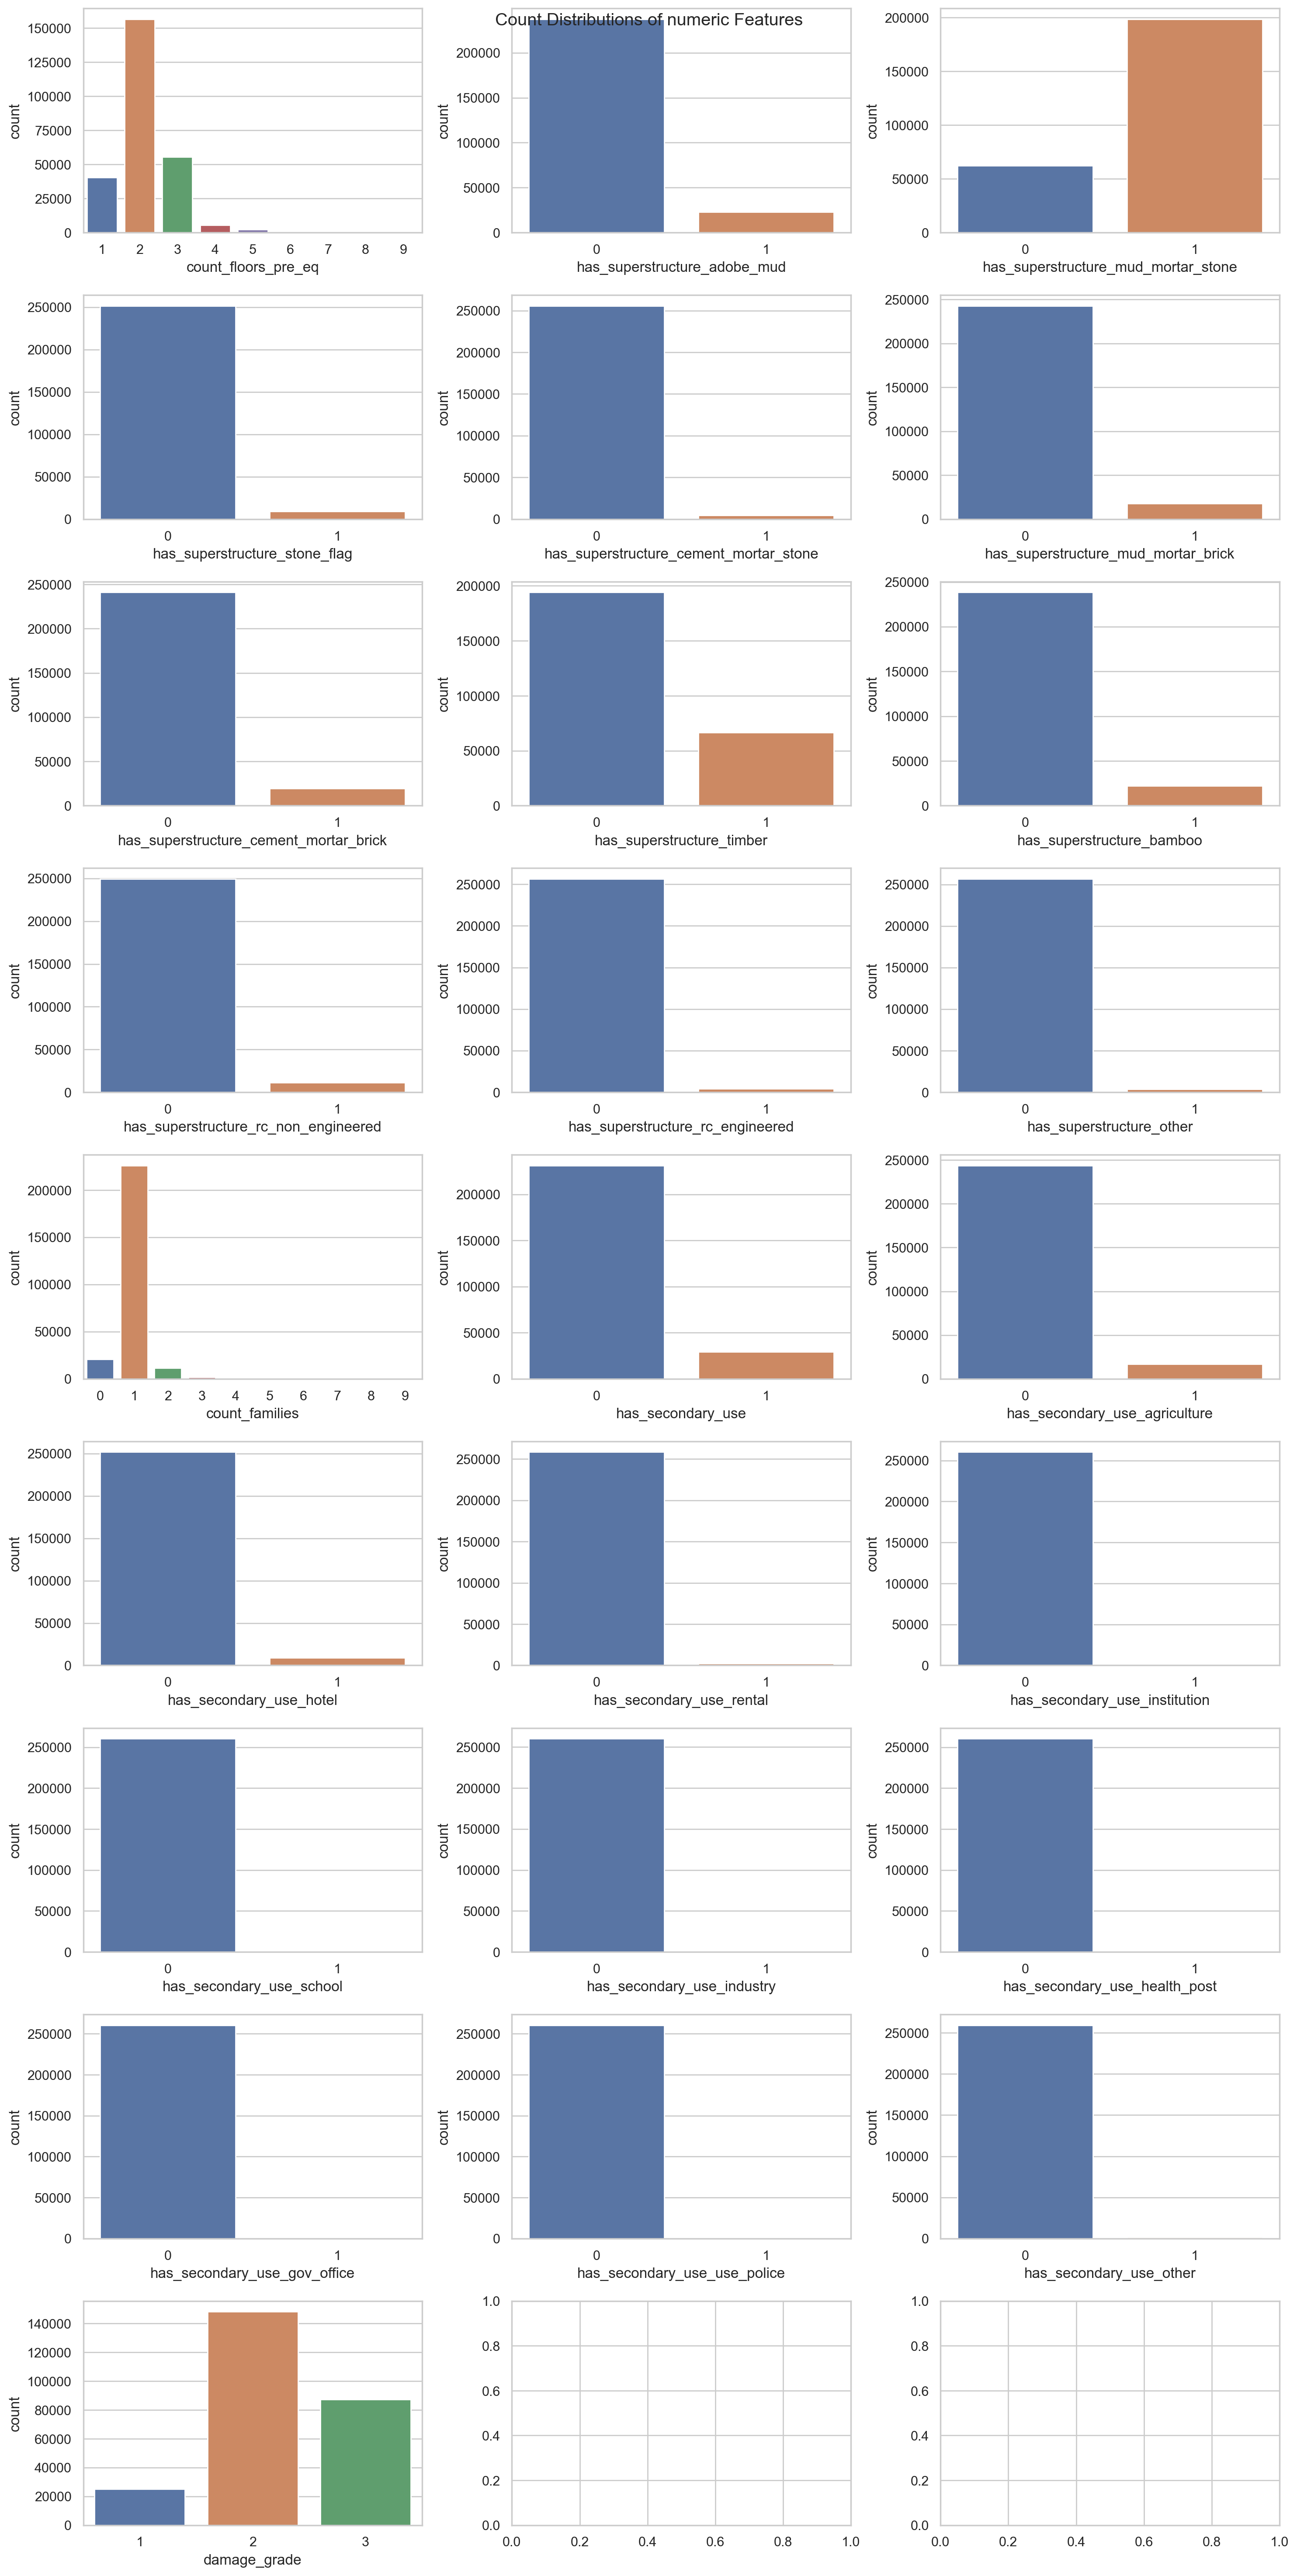

CPU times: total: 5.48 s
Wall time: 5.6 s


In [30]:
%%time
# Create a figure and subplots with the specified dimensions
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15,35))
fig.suptitle('Count Distributions of numeric Features')

# Loop over each column in the dataframe and plot its distribution
for i, feature in enumerate(df.columns):
    row = i // ncols
    col = i % ncols
    sns.countplot(df, x=feature, ax=axes[row, col])

plt.tight_layout()
plt.show()

**Findings:**
* features **has_secondary_use_x for x in {rental, institution, school, industry, health_post, gov_office, police, other}** highly imbalanced with an imbalance ratio of >93% -> uninformative column
* feature **has_substructure_x for x in {stone_flag, cement_mortar_stone, rc_engineered, other}** highly imbalanced with an imbalance ratio of >78%

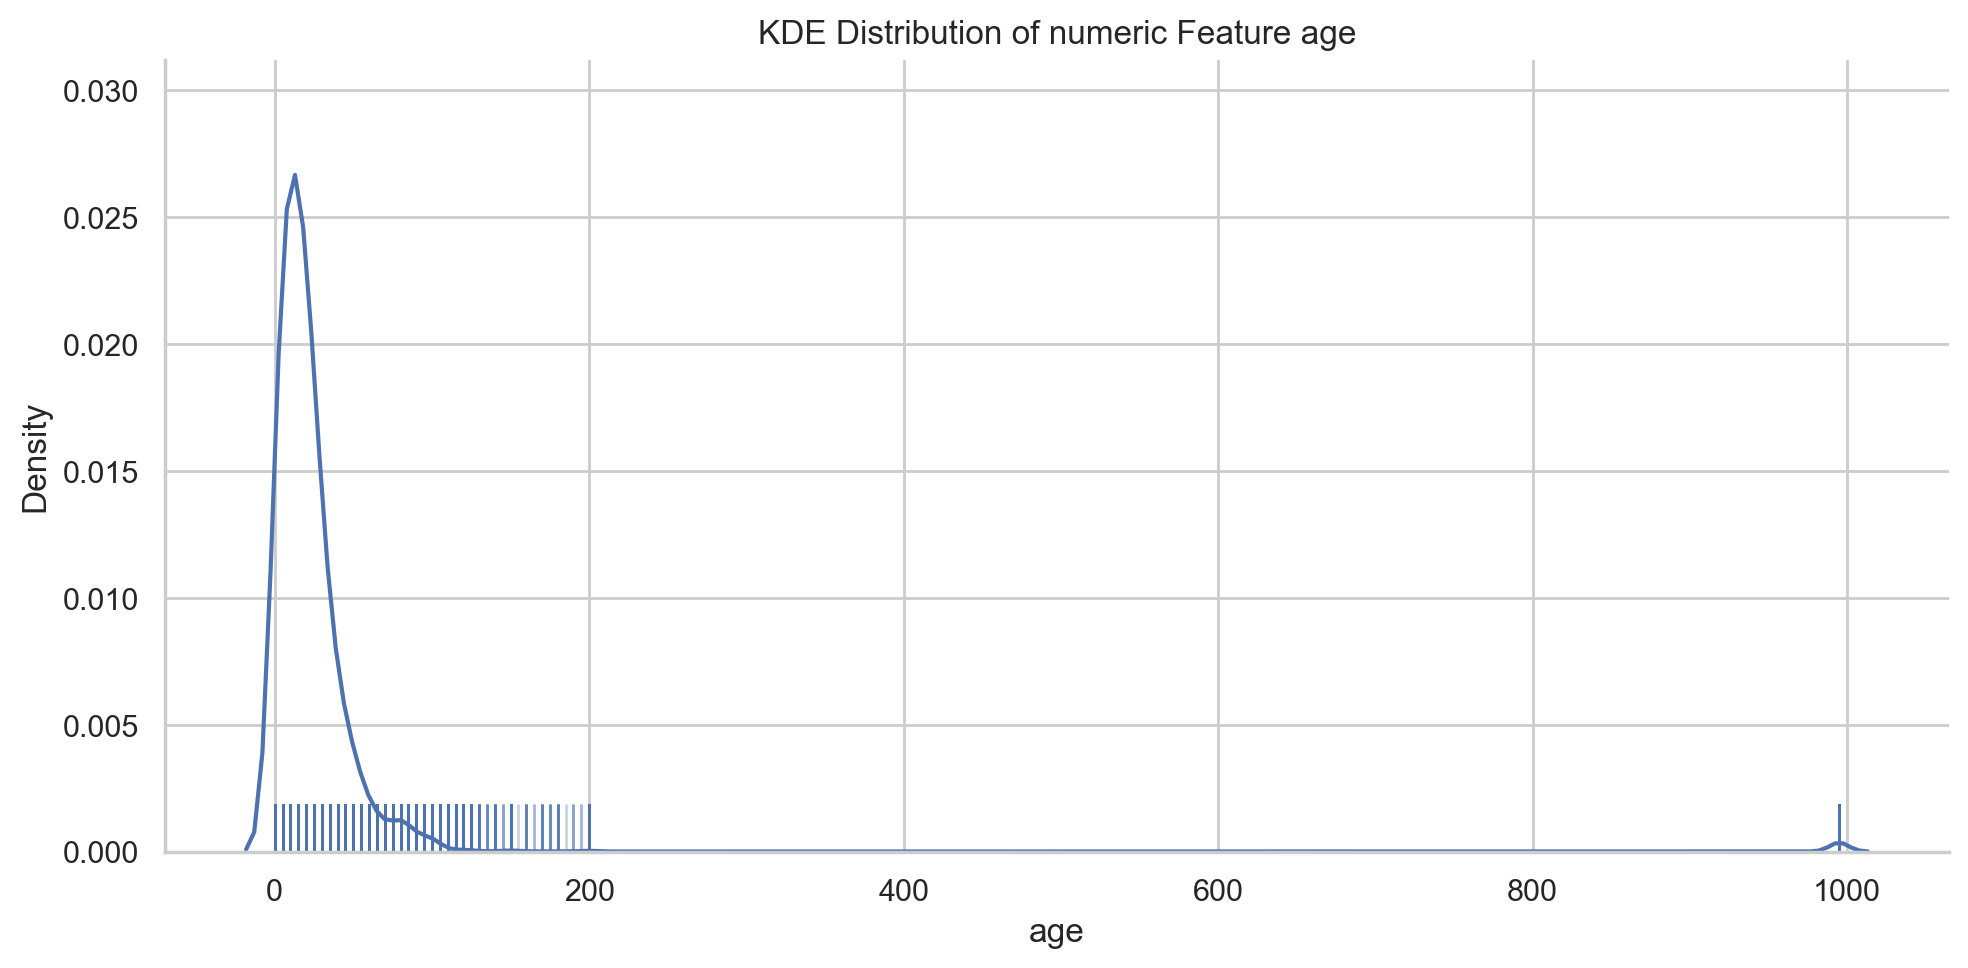

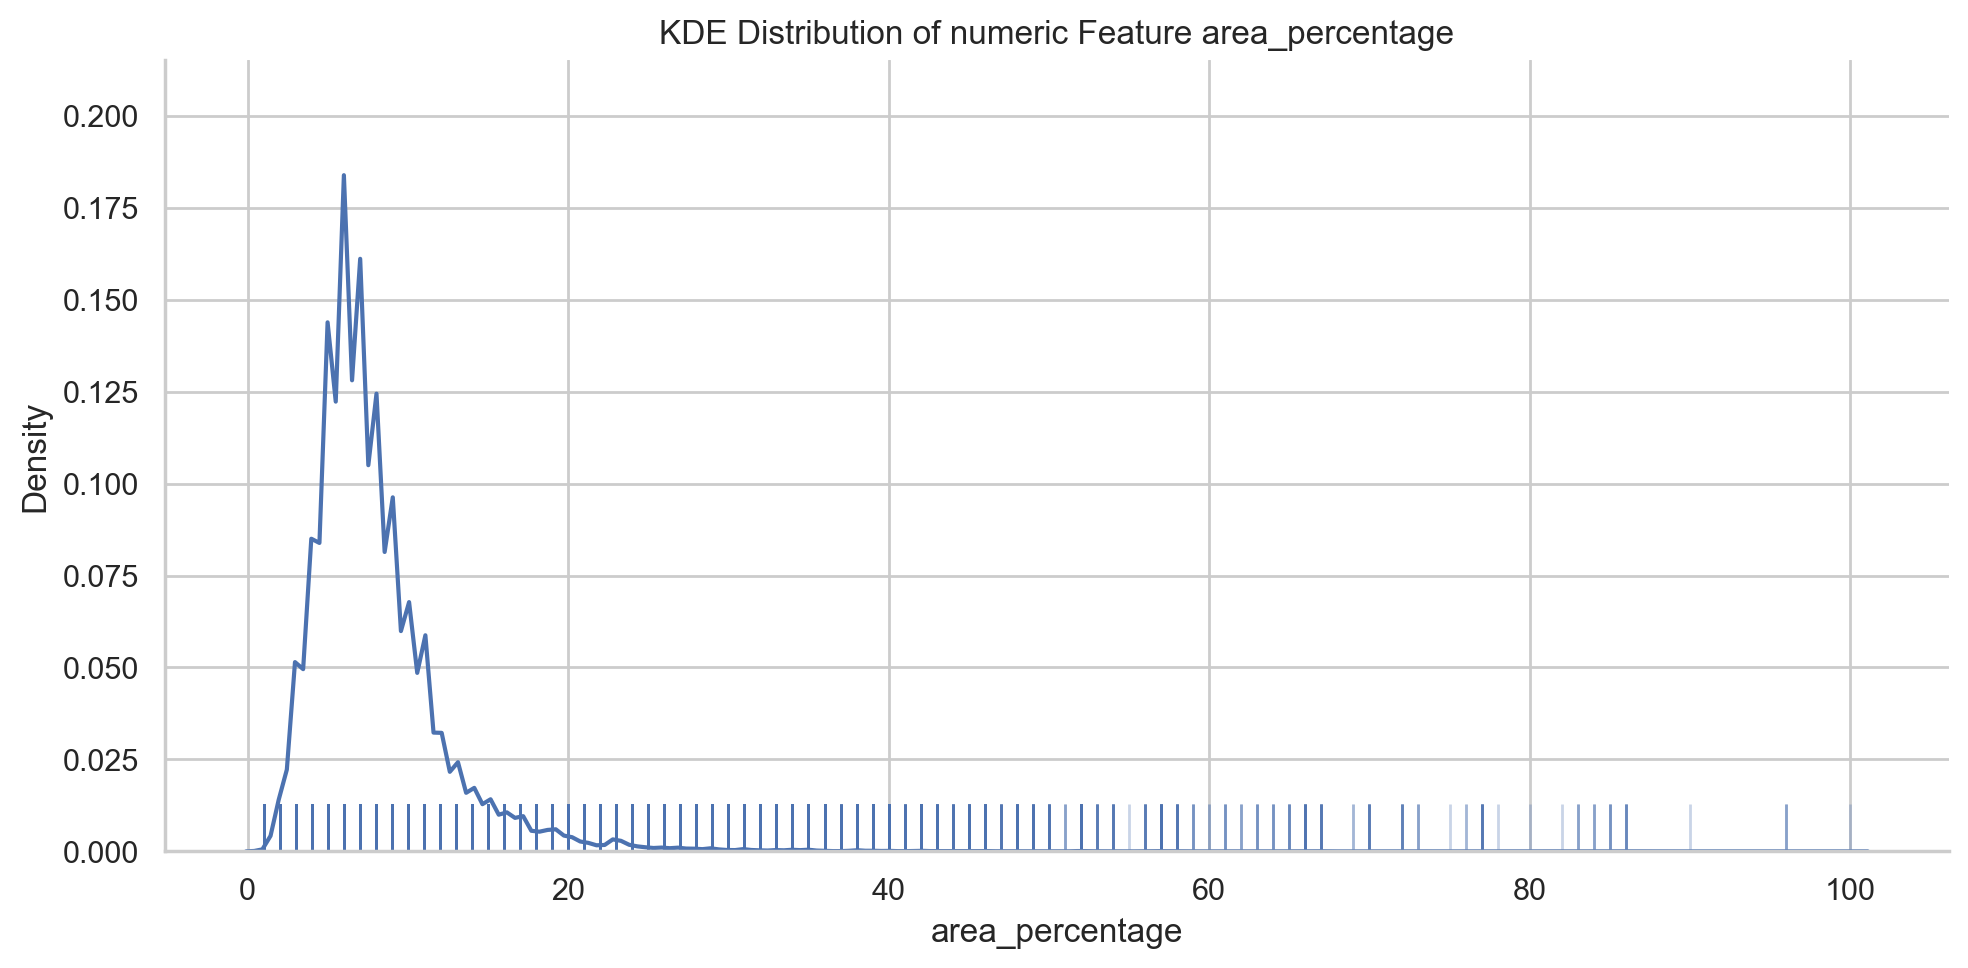

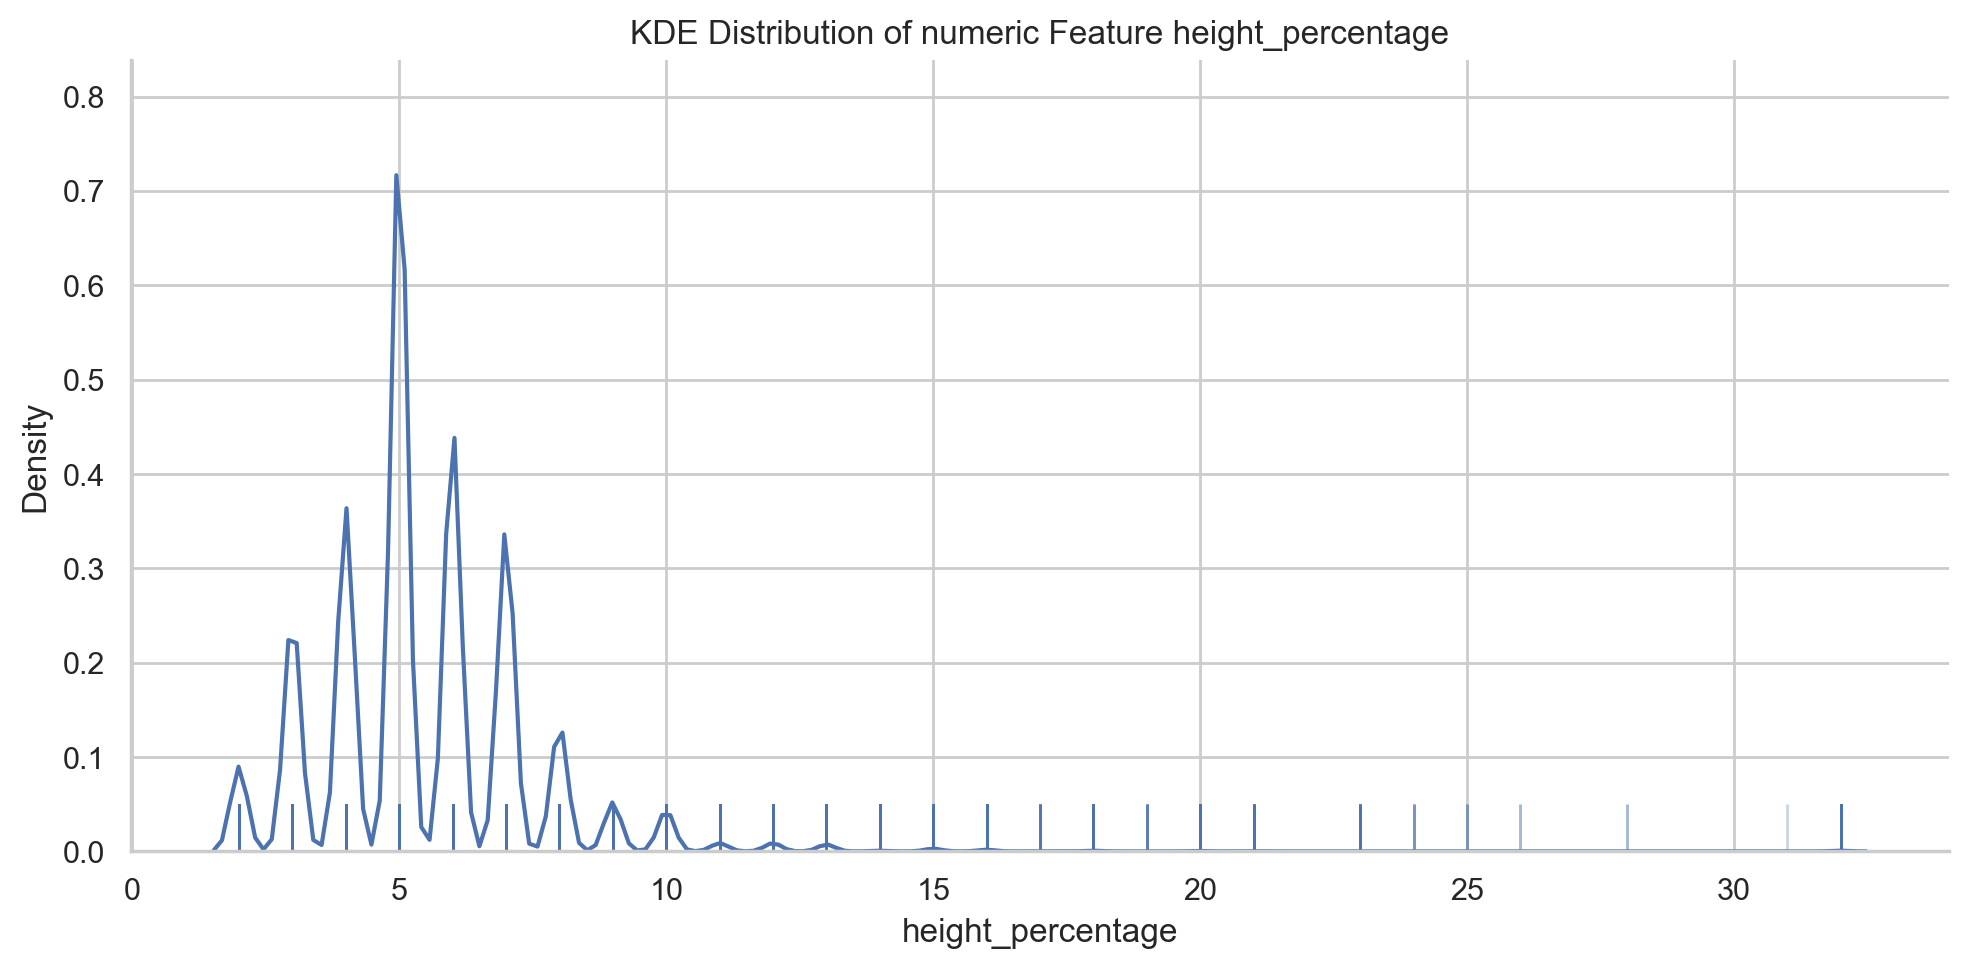

CPU times: total: 26 s
Wall time: 24.4 s


In [18]:
%%time
# plot kde
for feature in kde_cols:
    g = sns.displot(data=train_numeric, x=feature, kind="kde", rug=True, rug_kws={"color": "g", "alpha": 0.3, "linewidth": 1, "height":0.06})
    g.figure.set_figwidth(10)
    g.figure.set_figheight(5)
    g.set(title=f"KDE Distribution of numeric Feature {feature}")
    plt.tight_layout()
    plt.show()

**Findings:**
* Feature **age** is more distributed around the lower area with median 15 whereas the mean is actually 26.535029. But it can be noticed the presence of very high outliers in the plot.
* Feature **area_percentage** and also feature **height_percentage** have a rather better distributions and not so many outliers as age with a max differ of +1.1 between median and mean, yet there is a presence of outliers in **area_percentage**. Both are also more distributed on the lower numerical level.

#### Outliners
Find the actual outliers in the data using the statistical IQR method.

In [19]:
def find_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[
        ((df < (Q1 - 1.5 * IQR))|(df > (Q3 + 1.5 * IQR)))
        ]

    return outliers

In [31]:
df = train_numeric.drop(drop_cols, axis=1)

In [32]:
%%time
outliers = find_outliers(df)
outliers_stat = outliers.describe().transpose()[["count", "min", "max", "mean"]]
outliers_stat = outliers_stat[outliers_stat["count"] > 0.0].sort_values(by="count", ascending=False)
display(outliers_stat)

,count,min,max,mean
count_floors_pre_eq,103978.0,1.0,9.0,2.325126
has_superstructure_mud_mortar_stone,62040.0,0.0,0.0,0.000000
count_families,34486.0,0.0,9.0,0.878704
has_secondary_use,29156.0,1.0,1.0,1.000000
has_superstructure_adobe_mud,23101.0,1.0,1.0,1.000000
has_superstructure_bamboo,22154.0,1.0,1.0,1.000000
has_superstructure_cement_mortar_brick,19615.0,1.0,1.0,1.000000
has_superstructure_mud_mortar_brick,17761.0,1.0,1.0,1.000000
has_secondary_use_agriculture,16777.0,1.0,1.0,1.000000
area_percentage,13557.0,16.0,100.0,20.949694


CPU times: total: 938 ms
Wall time: 1.16 s


**Findings:**
* Feature **age** with 0.5% of the data (absolute 1390) being extremely high outliers with the value of '995'-> outliers skew distribution
* The outliers also include many **binary label encoded categorical features**. This is due to the fact that these features are highly imbalanced, so that a value simply being '1' already counts as an outlier.

### Distribution II: categorical features

In [44]:
# Choose data
df = train_cat[[col for col in train_cat.columns if col not in drop_cols]]

In [45]:
%%time
# Define the number of columns and rows for the subplot grid
ncols = 3
nrows = (df.shape[1] // ncols) + (1 if df.shape[1] % ncols != 0 else 0)

CPU times: total: 0 ns
Wall time: 0 ns


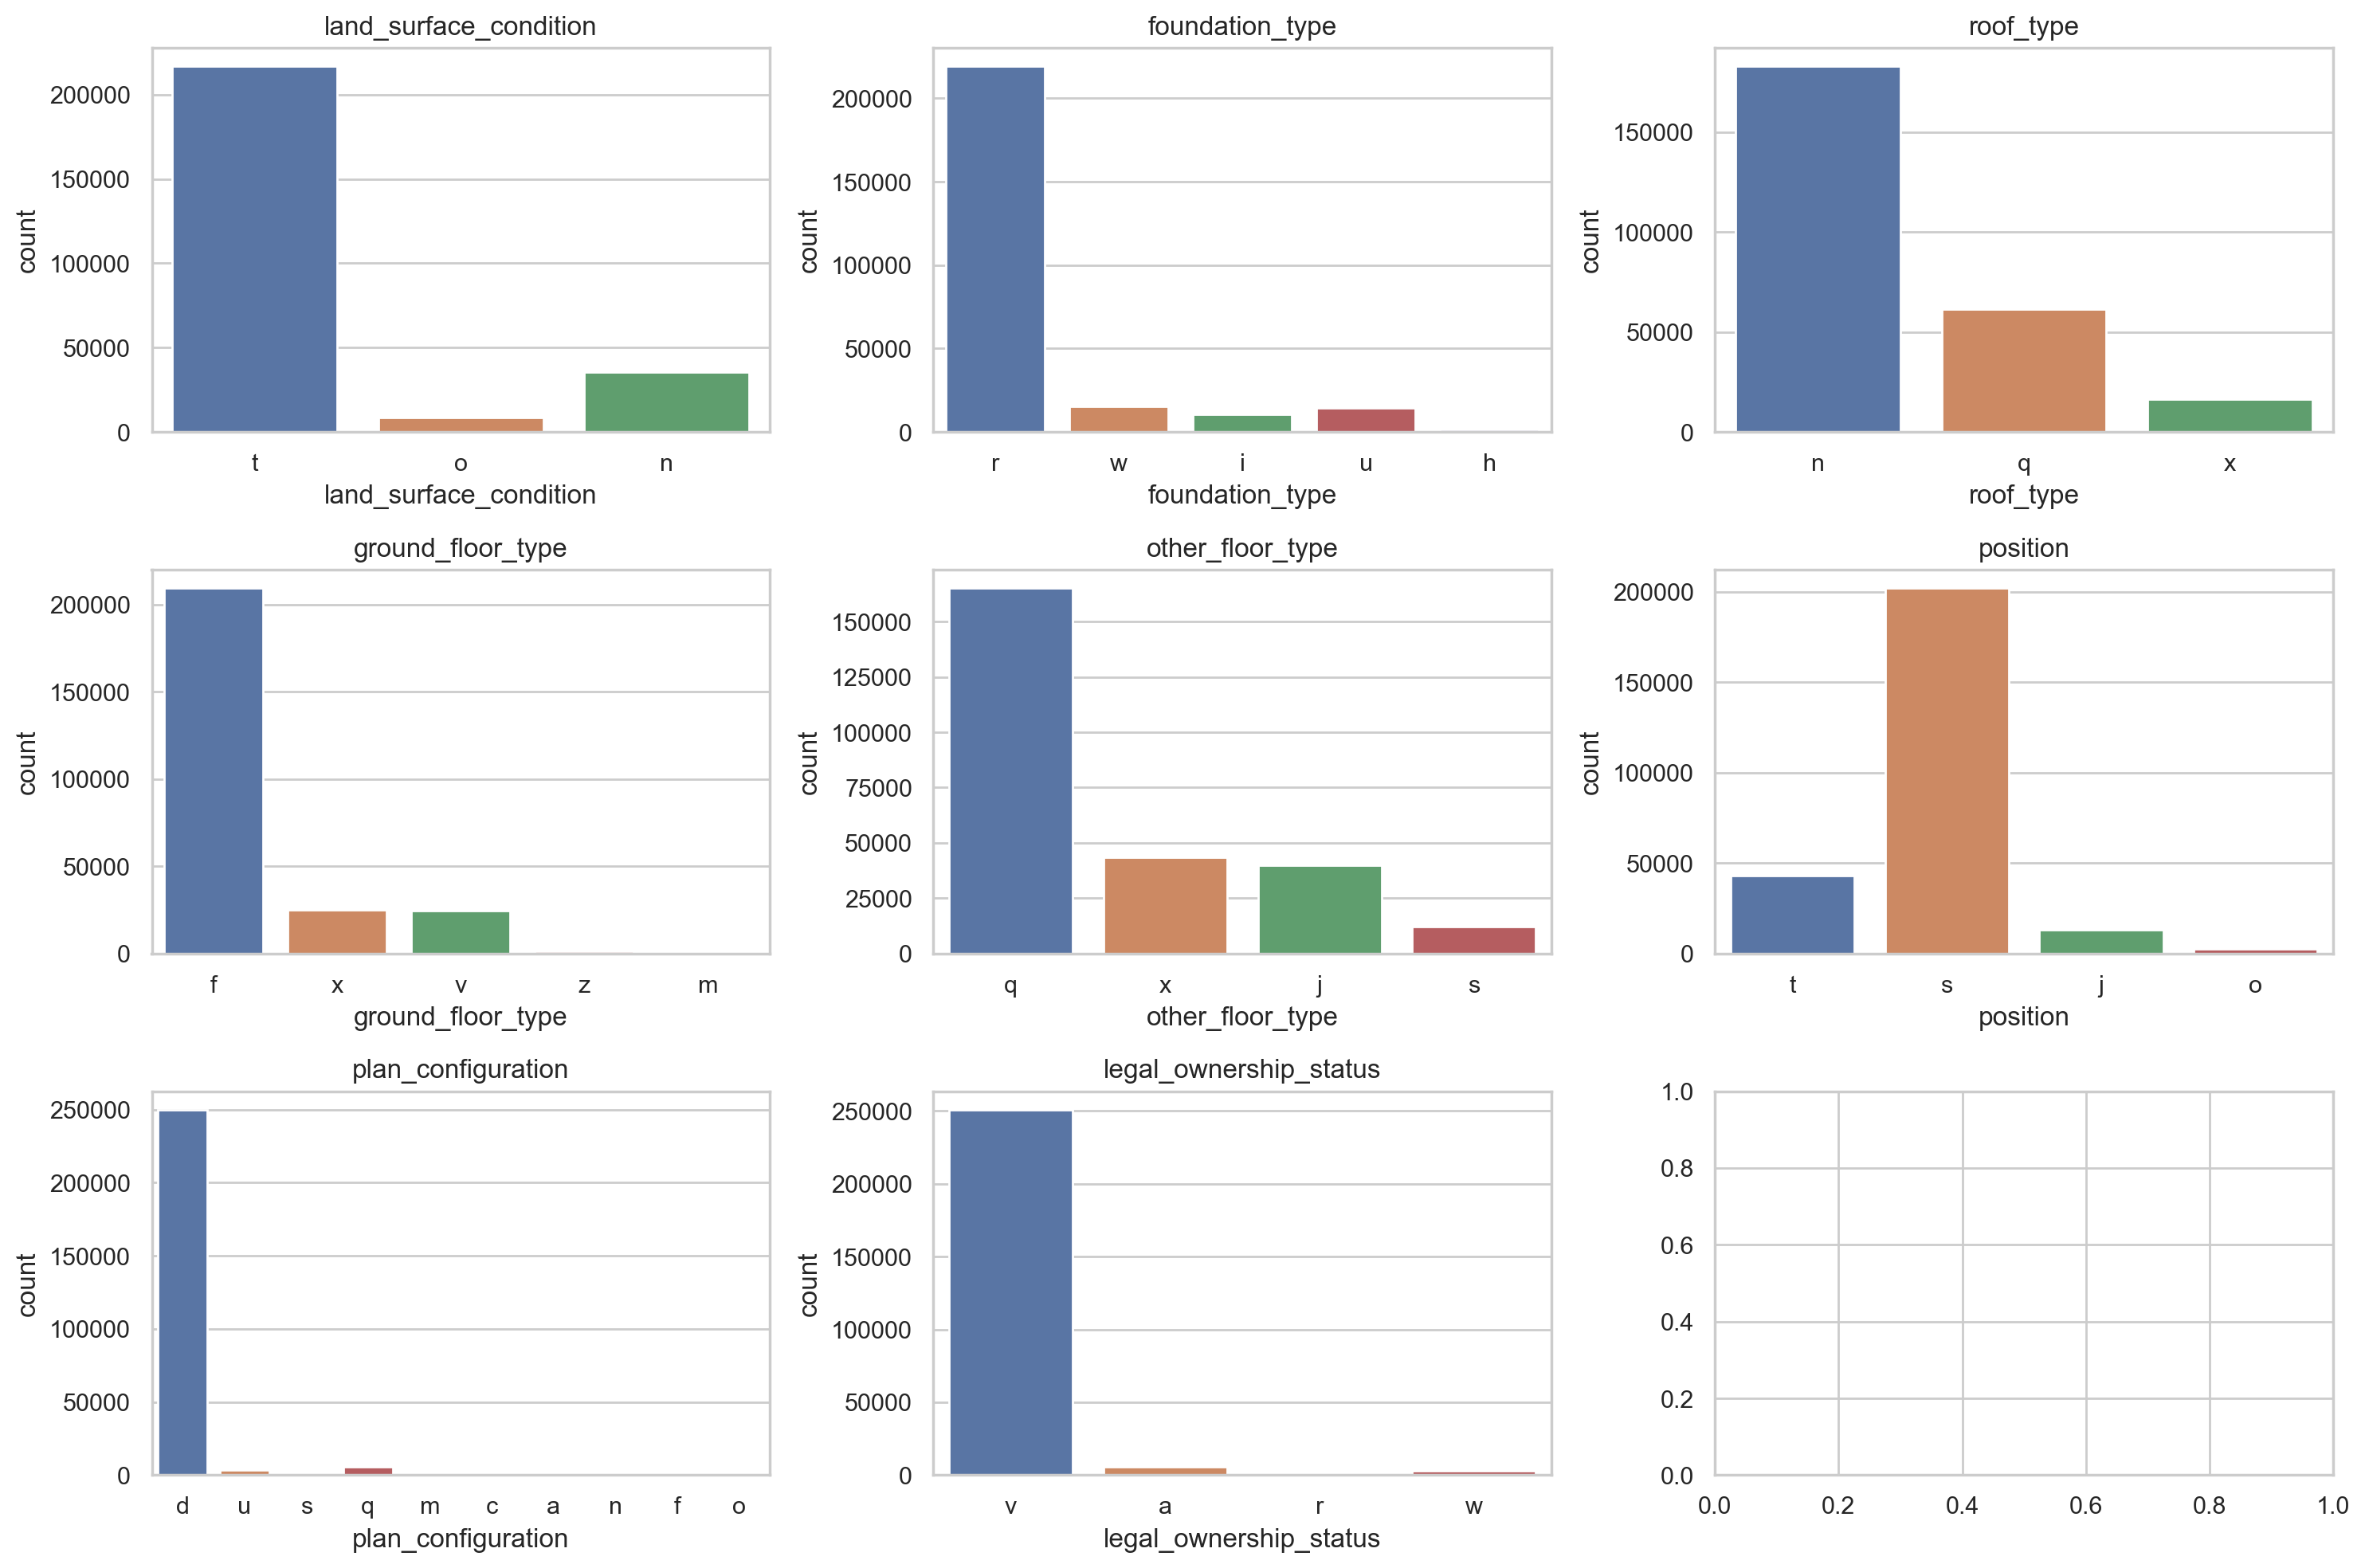

In [51]:
# Create a figure and subplots with the specified dimensions
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15,10))

# Loop over each column in the dataframe and plot its distribution
for i, feature in enumerate(df.columns):
    row = i // ncols
    col = i % ncols
    sns.countplot(df,x=feature, ax=axes[row, col])
    axes[row, col].set_title(feature)

# Adjust the spacing between the subplots
plt.tight_layout()

# Display the plot
plt.show()

**Findings:**
* feature **plan_configuration** highly imbalanced with major categories 'd' and 'q'
* feature **legal_ownership_status** highly imabalnced with major category 'v'
* feature **foundation_type** highly imabalnced with major category 'r'

## Outlook
* No Missing values
* No Duplicates
* Handle Imbalance:
    * Drop feature
    * Downsample
* Handle Outliers:
    * Set upper and lower limit,
    * then Cap outliers or Replace them with another default value (like missing values)
* Handle Categorical data:
    * Encoding
    * Summarize possible classes to one or only a few, but be carful, only with respect to the target distribution in these classes